In [41]:
import tensorflow as tf
from keras.models import load_model
from pathlib import Path
import pandas as pd
from art_api import utils, config
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("gs://art-api/data/df_yourpaintings.csv")

_request non-retriable exception: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401
Traceback (most recent call last):
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 115, in retry_request
    return await func(*args, **kwargs)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/core.py", line 384, in _request
    validate_response(status, contents, path, args)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 102, in validate_response
    raise HttpError(error)
gcsfs.retry.HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401


HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401

In [4]:
df = pd.read_csv(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_PATH}/{config.BUCKET_TRAIN_DATA_FILE}")

_request non-retriable exception: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401
Traceback (most recent call last):
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 115, in retry_request
    return await func(*args, **kwargs)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/core.py", line 384, in _request
    validate_response(status, contents, path, args)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 102, in validate_response
    raise HttpError(error)
gcsfs.retry.HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401


HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401

In [5]:
print(f"gs://{config.BUCKET_NAME}/{config.BUCKET_TRAIN_DATA_PATH}/{config.BUCKET_TRAIN_DATA_FILE}")

gs://art-api/data/raw_data/df_yourpaintings.csv


In [2]:
X, y = utils.load_data()

_request non-retriable exception: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401
Traceback (most recent call last):
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 115, in retry_request
    return await func(*args, **kwargs)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/core.py", line 384, in _request
    validate_response(status, contents, path, args)
  File "/Users/enjiaochen/.pyenv/versions/lewagon/lib/python3.8/site-packages/gcsfs/retry.py", line 102, in validate_response
    raise HttpError(error)
gcsfs.retry.HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401


HttpError: Anonymous caller does not have storage.objects.get access to the Google Cloud Storage object., 401

In [35]:
MODEL_PATH = Path("../models/vgg16_bal")
PATH_NGS = Path("../raw_data/aws10k")
PATH_NGS_SM = Path("../raw_data/aws10k_sm")

In [15]:
def resize_rescale(source):
    '''Download images and resize to 256x256 if not already in local disk
    Args:
        source: df, local, cloud
    Returns:
    '''
#    df = pd.read_csv(config.PATH_FILE)
    if source == "df":
        for index, row in df.iterrows():
            img_file = str(row["filename"])
            image = Image.open(os.path.join(config.PATH_YOURPAINTINGS, img_file))
            image = image.resize((256, 256), Image.ANTIALIAS)
            image.save(os.path.join(config.PATH_YOURPAINTINGS_SM, img_file))
            #imgs.append(np.array(image/255))
    if source == "path":
        for file in os.listdir(PATH_NGS):
            image = Image.open(os.path.join(PATH_NGS, file))
            image = image.resize((256, 256), Image.ANTIALIAS)
            image.save(os.path.join(PATH_NGS_SM, file))
    return "Images resized and rescaled"

In [16]:
resize_rescale(source="path")

/var/folders/11/0smvrnys6yn2p6mvqskf9vxm0000gn/T/ipykernel_12969/27729670.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize((256, 256), Image.ANTIALIAS)


'Images resized and rescaled'

# Predict on collection

In [18]:
model = load_model(MODEL_PATH)

2022-09-17 15:04:16.719023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
def load_data():
    '''generates X and y'''
    '''read from disk or read from cloud <--- to be implemented'''
    
    imgs = []

    for file in os.listdir(PATH_NGS_SM):
        print(file)
        image = Image.open(os.path.join(PATH_NGS_SM, file))
        imgs.append(np.array(image))
        X = np.array(imgs)
        X.shape        
    return X

GI-0650-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-03327.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03579.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0581.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0651-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03314.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-03333.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03223.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03278.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03545.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03328.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00742.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03551.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03237.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00835.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2020-00436.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00264.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00223.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00773.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00237.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00767.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03356.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04560.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00979.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03430.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-55381.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2005-01181.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-02706.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03418.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03443.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0386.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05656.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00951.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05642.jpg
<

2003-03220.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03290.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00273.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-01282.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0555.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00267.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2020-00435.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0227.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1139.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0674.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2005-00470.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1111.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03591.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2005-00316.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03585.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-01103.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04003.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-03365.jpg
<

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00622.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2016-00372.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00475.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00984.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0700.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03383.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1998-00406.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1065.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0354-O.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00006.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1999-01343.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03397.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-01077.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2006-00040.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00007.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03396.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1064.jpg
<class 'PI

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2008-06942.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03590.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2020-00434.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00266.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0540.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0675.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03285.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1138.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00514.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0232.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0554.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-01283.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00272.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1995-03737.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03547.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00299.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03221.jpg
<class 'PIL.Jpeg

<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00980.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2016-00376.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00626.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0431.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00994.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2004-00615.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03393.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1075.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-02968.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1999-01347.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0738-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0354-K.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00016.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0419.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0739-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0433-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1061.jpg
<class 'P

2003-03554.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0584.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03241.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1996-00033.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00854.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03255.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0590.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00720.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03568.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03583.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0282-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0209.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1117.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00818.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03597.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00249.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00261.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0221.jpg


2015-00369.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1260.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-01594.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-55623.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03192.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01690.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00043.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-00661.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00331.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0195.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00325.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01684.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00418.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04164.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05323.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-00113.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03623.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-

2003-03917.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0737.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0051.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00246.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-02966.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1991-00227.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0079.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03081.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04088.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03095.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-01801.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-53355.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00153.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00342.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00030.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04103.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03678.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-0411

2010-00738.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-03118.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2020-00285.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03309.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2006-01897.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2004-01036.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03686.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0266-D.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1206.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0118.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-02487.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2014-01338.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1212.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0239.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2006-01883.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-02185.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03692.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03862.jpg

2003-03733.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
ASB-0028.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0913.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0907.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04048.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03727.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04111.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03041.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-00411.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0052.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00245.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-02965.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03914.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0734.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-01050.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03900.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0046.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03096.jpg
<cla

GI-0574.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03184.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1239.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0641.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03861.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00783.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03652.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00441.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03134.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05408.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-50931.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03120.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0683-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04129.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03646.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04101.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00032.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-0

2003-03642.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0024-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0148-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03130.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00169.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0149-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04139.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00445.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03656.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1996-01749.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00436.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04111.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03118.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00022.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1995-02076.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00350.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00141.jpg
<class 'PIL.JpegImagePlugin.JpegIma

1995-03396.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-02481.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00037.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-02248.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00154.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00345.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00478.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04104.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00484.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04110.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00490.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0687.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00351.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1995-02077.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00023.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03119.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00168.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2

2003-04066.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
ASB-0012.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2006-01918.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0349.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03084.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00982.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0068.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-53350.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1996-01819.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0249-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04099.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0726.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0375.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-01056.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03906.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1991-00236.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00257.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-01838.

P-0492.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03431.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2008-06890.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03442.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03419.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-01722.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00245.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04512.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03324.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03330.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04506.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-03121.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00251.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03456.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00388.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01630.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03182.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
G

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00363.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03895.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05365.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00777.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04122.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03881.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03659.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-00166.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00005.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00839.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03117.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05359.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00462.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03671.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-02166.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03665.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2018-00476.j

2003-04094.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03923.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01012.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04126.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03710.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0924.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03704.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04132.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
ASB-0037.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04043.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2014-01286.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
ASB-0023.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03738.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04057.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0918.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0393.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1151.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1145.jpg
<clas

2011-01062.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03359.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00263.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03302.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04534.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-02219.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04520.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03316.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-03107.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00277.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0196-B.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-01076.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03470.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-03548.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01399.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2008-06849.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2016-00324.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>

2003-03505.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00759.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03511.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03368.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2004-00901.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03277.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-00627.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00316.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1191.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03539.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03340.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03354.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03210.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0025-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0243-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03228.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00312.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile

<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1235.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03188.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1998-00130.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0087-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03879.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00237.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1221.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00364.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00016.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04125.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03892.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04131.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03886.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-02037.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05410.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2019-00002.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03138.jpg
<cl

2011-02223.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0418-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05162.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0419-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03338.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-03129.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03363.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00259.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1035.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03388.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1999-00019.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01348.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1021.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2016-00450.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2020-00263.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2004-00899.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01406.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2

<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00251.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0239.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1127.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00279.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0616-(OT).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1133.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04035.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03982.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1998-00961.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0497.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1996-00215.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0140-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2012-00260.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04021.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05266.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03996.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0946.jpg
<class 'PIL.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2004-00626.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03388.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0370.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0416.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00601.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03405.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2002-00225.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1085.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00202.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03338.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00752.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03363.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04555.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04541.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03377.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00958.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1091.jpg
<class 'PIL.J

2003-04036.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03981.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0979.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04147.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03771.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0951.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-52977.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0789.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00176.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03017.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1998-00786.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0945.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03765.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04153.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03956.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00318.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0776.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0325.jpg
<clas

2007-52989.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00319.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03957.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1991-00267.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-01700.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0442.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00188.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2008-07670.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03764.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04152.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-52962.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0788.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-52976.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0950.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-03379.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04146.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03770.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-004

<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04153.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05300.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04147.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03628.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-00130.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-09133.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0331-(PC).jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0808.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2014-01396.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-02041.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1243.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00241.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00438.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2011-00871.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03199.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-05906.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00410.jpg
<cl

ASB-0052.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-04026.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03749.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0969.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2000-05898.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1997-03368.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04157.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03761.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0799.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0941.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00166.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2008-06219.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00172.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-52973.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0955.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03775.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04143.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00813.jpg


2003-03824.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2015-00413.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0604.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0531.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03415.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00742.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03328.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00212.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2007-01093.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03373.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04545.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1993-00948.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-04551.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03367.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-00756.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1081.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2013-00206.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0372-

P-0942.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
GI-0646.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0215.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0567.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00241.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0201.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1137.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-0229.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00269.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
P-1123.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2017-00860.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2010-03316.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2009-03513.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2003-03548.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00296.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
2001-03331.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1992-00282.jpg
<class 'PIL.JpegImagePlugin.JpegImageFile'>
1994-05074.jpg
<class 'PIL.J

KeyboardInterrupt: 

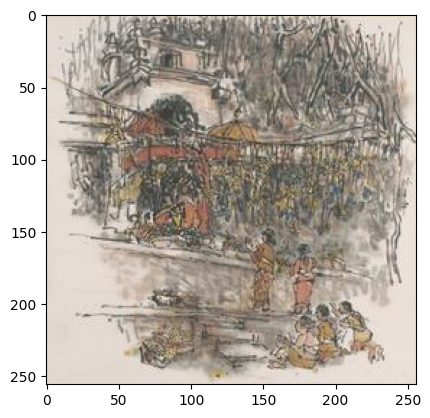

In [45]:
X = load_data()

In [ ]:
pred = model.predict